# Линейная регрессия. Работа с признаками

## Описание задачи и загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Посмотрим на типы столбцов.

In [3]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

## Построение модели

### Задание 1

Есть ли в наборе данных пропущенные значения? Если да, удалите их.

Также выведите на экран число пропусков в каждом столбце.

In [4]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

### Задача 2

Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)?  
Если да, то удалите их.

In [5]:
data = data.drop('Unnamed: 0', axis = 1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Задание 3

Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются корреляции между признаками.  
Выведите матрицу корреляций между всеми вещественными признаками и целевой переменной.

Какой вещественный признак коррелирует с целевой переменной больше всего?

C:\Users\админ\AppData\Local\Temp\ipykernel_15992\3161595267.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


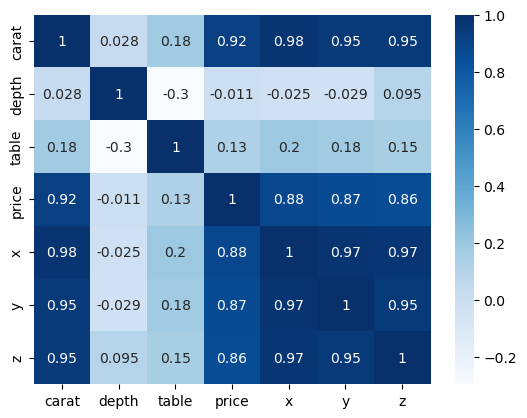

In [6]:
corr = data.corr()
sns.heatmap(corr, cmap='Blues', annot=True)
plt.show()

**Ответ :** Carat

### Задание 4

Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования ([`pd.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Не забудьте поставить значение параметра `drop_first` равным `True`.

Сколько получилось столбцов в таблице `data`?

In [7]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [8]:
print(f'{data.shape[1]} столбца')

24 столбца


### Задание 5

Создайте матрицу `X`, содержащую все признаки, и не содержащую целевую переменную `price`. Также создайте вектор `y`, содержащий целевую переменную `price`.

In [9]:
X = data.drop('price', axis = 1)
y = data.price

Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной `0.3`.

При разбиении укажите `random_state = 42`.

In [10]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

### Задание 6

Зачастую при использовании линейных моделей вещественные признаки масштабируются.  В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

*  Обучите (`fit`) scaler на тренировочных данных
*  Преобразуйте (`transform`) и трейн, и тест

После применения масштабирования матрица перестает быть объектом `pandas.DataFrame` - решите эту проблему.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xtrain_sc = pd.DataFrame(scaler.fit_transform(Xtrain), columns=Xtrain.columns)
Xtest_sc = pd.DataFrame(scaler.transform(Xtest), columns=Xtest.columns)


### Задание 7

Обучите линейную регрессию на тренировочной выборке. Выведите *r2-score* на тренировочной и тестовой выборках.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(Xtrain_sc, ytrain)
ypred = model.predict(Xtest_sc)

print(f' R2 = {r2_score(ytest, ypred).round(4)}')

 R2 = 0.9202


### Задание 8

Выведите на экран веса, которые линейная регрессия присвоила признакам.

Какой признак имеет наибольший отрицательный вес? (наибольший по модулю среди всех отрицательных весов)

In [13]:
features = Xtrain.columns
weights = model.coef_
feature_weights = pd.DataFrame({'Feature': features, 'Weight': weights})
feature_weights.sort_values('Weight')

,Feature,Weight
3,x,-1100.418850
15,color_J,-529.449216
14,color_I,-442.783567
13,color_H,-362.002300
12,color_G,-202.863564
11,color_F,-104.560993
1,depth,-90.173817
10,color_E,-83.640021
2,table,-60.332280
5,z,-34.258945


**Ответ:** Наибольший отрицательный вес имеет признак X

## Попытка улучшить качество модели

Данная часть является творческой, и задания в ней немного сложнее, чем предыдущие.

Следующие вопросы не проверяются тестами.

### Задание 9

Как можно заметить из анализа корреляционной матрицы в задании 3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче, также свидетельствуют об этом. Для решения этой проблемы можно либо исключить некоторые признаки из модели (например, если признак линейно зависим с какими-то другими, его можно исключить из модели, т.е. удалить из матрицы объект-признак и заново обучить модель).

Удалите из матриц `Xtrain` и `Xtest` признак, который наиболее сильно коррелирует с остальными. Заново обучите модель и оцените её качество. Улучшилось ли качество модели?

Попробуйте удалить какой-то другой признак (можете попробовать несколько вариантов). Помогло ли это улучшить качество модели?

<Axes: >

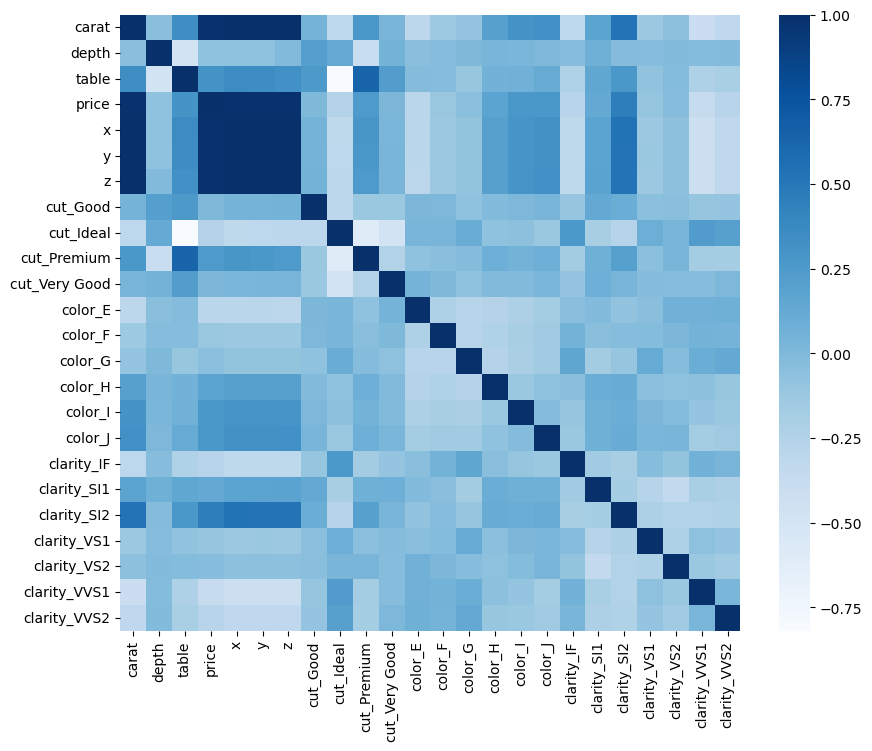

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr().corr(), cmap= 'Blues')



In [15]:
#drop 'X', 'y', 'z', 'carat'
Xtrain_sc = Xtrain_sc.drop(['z'], axis=1)
Xtest_sc = Xtest_sc.drop(['z'], axis=1)

In [16]:
#training model 
model = LinearRegression()
model.fit(Xtrain_sc, ytrain)
ypred = model.predict(Xtest_sc)
print(f' R2 = {r2_score(ytest, ypred).round(4)}')

 R2 = 0.9202


### Задание 10

Иногда генерация новых признаков помогает модели лучше находить взаимосвязи между целевой переменной и признаками. Попробуйте придумать новые признаки и добавить их в модель.  

Помогло ли это улучшить качество модели?

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

Xtrain_sc_poly = poly.fit_transform(Xtrain_sc)
Xtest_sc_poly = poly.transform(Xtest_sc) 

In [18]:
#training model 
model = LinearRegression()
model.fit(Xtrain_sc_poly, ytrain)
ypred = model.predict(Xtest_sc_poly)
print(f' R2 = {r2_score(ytest, ypred).round(4)}')

 R2 = 0.8901
